Columns in the fetched data: Index(['user_id', 'application', 'session_duration', 'download_data',
       'upload_data', 'handset_type'],
      dtype='object')
        user_id application  session_duration  download_data  upload_data  \
0  3.366496e+10     Samsung         1823652.0    308879636.0   36749741.0   
1  3.368185e+10     Samsung         1365104.0    653384965.0   53800391.0   
2  3.376063e+10     Samsung         1361762.0    279807335.0   27883638.0   
3  3.375034e+10   undefined         1321509.0    846028530.0   43324218.0   
4  3.369980e+10     Samsung         1089009.0    569138589.0   38542814.0   

                  handset_type  
0   Samsung Galaxy A5 Sm-A520F  
1  Samsung Galaxy J5 (Sm-J530)  
2     Samsung Galaxy A8 (2018)  
3                    undefined  
4             Samsung Sm-G390F  
Cleaned Data:
         user_id application  session_duration  download_data  upload_data  \
92  3.368542e+10     Samsung          243504.0    556406594.0   43336429.0   
93  3.366

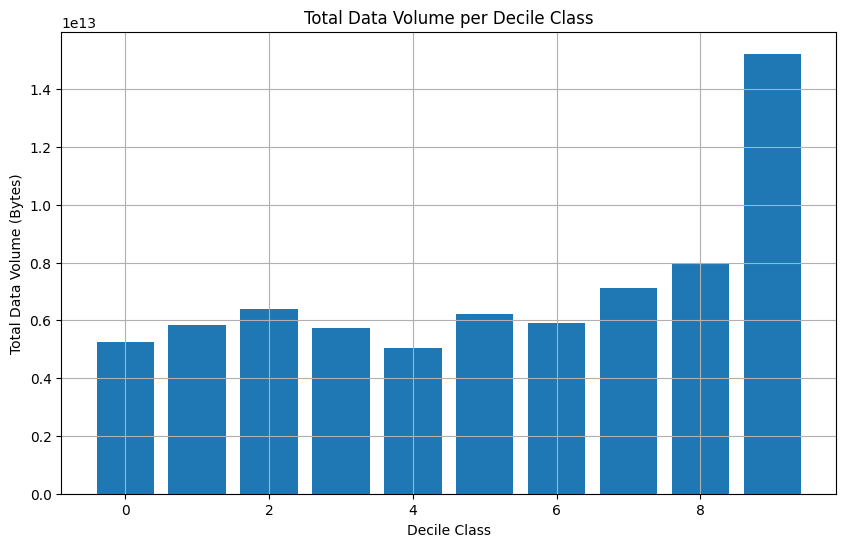

Aggregated Data:
        user_id  number_of_sessions  total_session_duration  \
0  3.360100e+10                   1                116720.0   
1  3.360100e+10                   1                181230.0   
2  3.360100e+10                   1                134969.0   
3  3.360101e+10                   1                 49878.0   
4  3.360101e+10                   2                 37104.0   

   total_download_data  total_upload_data  total_data_volume  decile  \
0         8.426375e+08         36053108.0       8.786906e+08       5   
1         1.207552e+08         36104459.0       1.568596e+08       8   
2         5.566597e+08         39306820.0       5.959665e+08       6   
3         4.019932e+08         20327526.0       4.223207e+08       1   
4         1.363130e+09         94280527.0       1.457411e+09       1   

   total_data_volume_per_decile  
0                  6.210993e+12  
1                  7.996600e+12  
2                  5.895254e+12  
3                  5.849310e+12  
4

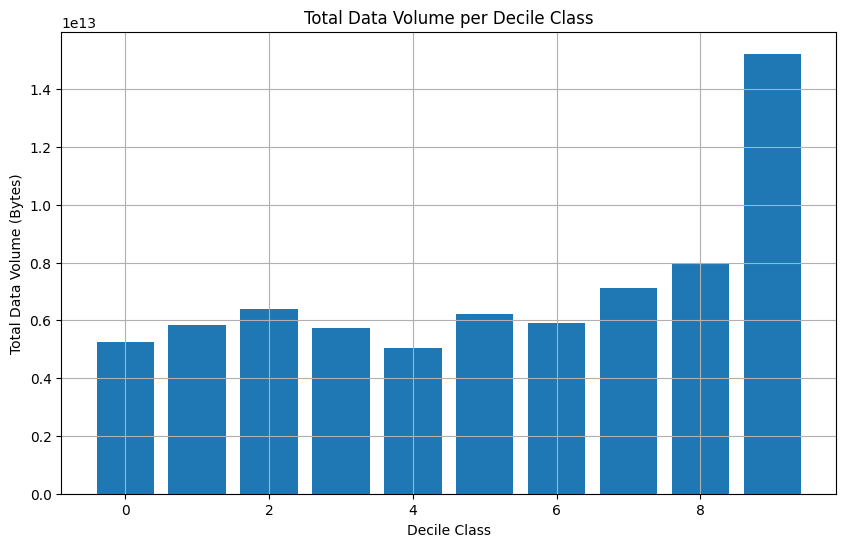

Type of aggregated_data: <class 'pandas.core.frame.DataFrame'>
Type of total_data_per_decile: <class 'pandas.core.frame.DataFrame'>
Aggregated Data:
        user_id  number_of_sessions  total_session_duration  \
0  3.360100e+10                   1                116720.0   
1  3.360100e+10                   1                181230.0   
2  3.360100e+10                   1                134969.0   
3  3.360101e+10                   1                 49878.0   
4  3.360101e+10                   2                 37104.0   

   total_download_data  total_upload_data  total_data_volume  decile  \
0         8.426375e+08         36053108.0       8.786906e+08       5   
1         1.207552e+08         36104459.0       1.568596e+08       8   
2         5.566597e+08         39306820.0       5.959665e+08       6   
3         4.019932e+08         20327526.0       4.223207e+08       1   
4         1.363130e+09         94280527.0       1.457411e+09       1   

   total_data_volume_per_decile  
0    

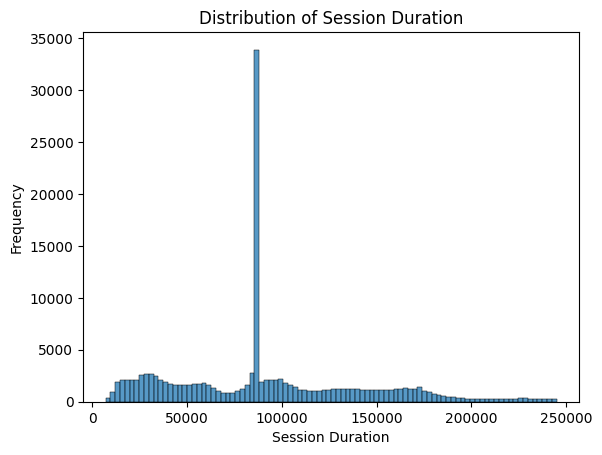

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Add the src directory to the system path for importing modules
sys.path.append(os.path.abspath('C:/Users/Hp/User_Overview_Analysis/scripts'))
from aggregate_data import aggregate_user_data
from extract_data import connect_to_db
from clean_data import clean_data  # Import the clean_data function

# Fetch data from PostgreSQL using the function from extract_data.py
df = connect_to_db()

# Verify loaded data
print("Data loaded successfully!")
print(df.info())
print(df.head())

# Clean the data using the function from clean_data.py
df = clean_data(df)

# Verify cleaned data
print("Cleaned Data:")
print(df.info())
print(df.head())

# Aggregate data
aggregated_data, total_data_per_decile = aggregate_user_data(df)

# Check the type of aggregated_data and total_data_per_decile
print(f"Type of aggregated_data: {type(aggregated_data)}")
print(f"Type of total_data_per_decile: {type(total_data_per_decile)}")

# Print the first few rows of aggregated_data to verify the result
print("Aggregated Data:")
print(aggregated_data.head())

# Print the total data per decile to verify the result
print("Total Data per Decile:")
print(total_data_per_decile.head())

# Univariate Analysis - Histogram for session_duration
sns.histplot(df['session_duration'])
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.show()



